In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


(112, 92)
(64, 64)


(-0.5, 63.5, 63.5, -0.5)

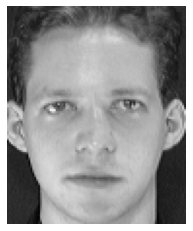

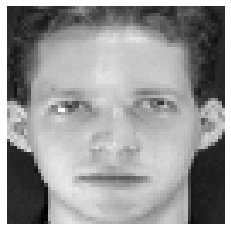

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.image as mimg 
import numpy as np

import matplotlib.pyplot as plt 
from tensorflow import keras
import tensorflow as tf
import cv2 # open cv library image processing

path = '/gdrive/MyDrive/orl_faces/u(1)/1.png'

im = mimg.imread(path)
print(im.shape)
imNew = cv2.resize(im,(64,64))
print(imNew.shape)
plt.figure(1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.figure(2)
plt.imshow(imNew,cmap='gray')
plt.axis('off')

In [4]:
# read all the images and create the X and y for further processing using CNN 
images = np.zeros((400,90,90))
target = np.zeros((400))
count = -1
for i in range(1,41,1):
  for j in range(1,11,1):
    path = '/gdrive/MyDrive/orl_faces/u(%d)/%d.png'%(i,j)
    im = mimg.imread(path)
    imNew = cv2.resize(im,(90,90))
    images[count,:,:]=imNew
    target[count]=i-1
    count = count+1



In [5]:
#CNN for this above data

Xtrain,Xtest,ytrain,ytest = train_test_split(images,target,test_size=0.5,random_state=2)


In [15]:
# CNN 
# create the CNN model 
cnnModel = keras.models.Sequential()

# add input CNN layer 
cnnModel.add(keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(90,90,1)))
# add the maxpooling layer 
cnnModel.add(keras.layers.MaxPool2D((2,2)))
cnnModel.add(keras.layers.Dropout(0.3))

# add input CNN layer (iind Layer)
cnnModel.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# add the maxpooling layer 
cnnModel.add(keras.layers.MaxPool2D((2,2)))
cnnModel.add(keras.layers.Dropout(0.3))



cnnModel.add(keras.layers.Flatten())
cnnModel.add(keras.layers.Dense(128,activation = 'relu'))
cnnModel.add(keras.layers.Dense(128,activation = 'relu'))
cnnModel.add(keras.layers.Dense(128,activation = 'relu'))
cnnModel.add(keras.layers.Dense(40)) # total 40 users 


cnnModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 88, 88, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 44, 44, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 44, 44, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 42, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 21, 21, 64)       

In [16]:

#opt = keras.optimizers.Adam(learning_rate=0.001)
opt= keras.optimizers.Adamax(learning_rate=0.001)
cnnModel.compile(optimizer=opt,loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

History = cnnModel.fit(Xtrain,ytrain,epochs=100,validation_data = (Xtest,ytest))


Epoch 1/100
7/7 [==============================] - 1s 61ms/step - loss: 3.7263 - accuracy: 0.0350 - val_loss: 3.6914 - val_accuracy: 0.0150
Epoch 2/100
7/7 [==============================] - 0s 35ms/step - loss: 3.6823 - accuracy: 0.0350 - val_loss: 3.6928 - val_accuracy: 0.0100
Epoch 3/100
7/7 [==============================] - 0s 31ms/step - loss: 3.6686 - accuracy: 0.0400 - val_loss: 3.7121 - val_accuracy: 0.0100
Epoch 4/100
7/7 [==============================] - 0s 31ms/step - loss: 3.6340 - accuracy: 0.0600 - val_loss: 3.7451 - val_accuracy: 0.0100
Epoch 5/100
7/7 [==============================] - 0s 31ms/step - loss: 3.5916 - accuracy: 0.0600 - val_loss: 3.7399 - val_accuracy: 0.0250
Epoch 6/100
7/7 [==============================] - 0s 31ms/step - loss: 3.5371 - accuracy: 0.0550 - val_loss: 3.7284 - val_accuracy: 0.0250
Epoch 7/100
7/7 [==============================] - 0s 31ms/step - loss: 3.4482 - accuracy: 0.1400 - val_loss: 3.6853 - val_accuracy: 0.0900
Epoch 8/100
7/7 [===

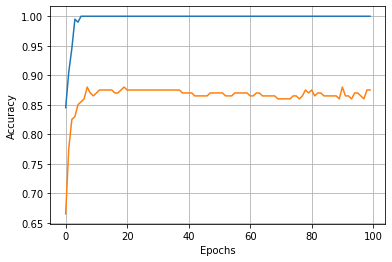

In [12]:
import matplotlib.pyplot as plt
plt.plot(History.epoch,History.history['accuracy'],label='Train')
plt.plot(History.epoch,History.history['val_accuracy'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid('on')